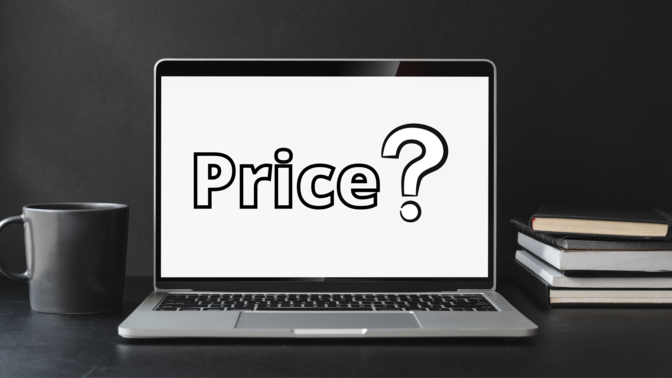

<center><h2 style='font-family:monospace;'>LAPTOP PRICE PREDICTION USING ML 💻💻</h2></center>
<center>Dataset Link <br><a href = 'https://www.kaggle.com/ionaskel/laptop-prices'>Laptop Prices(Characteristics and Price for 1300 laptop models)</a></center>


<h3>Columns</h3>

1. **Company Name**<br>           (Eg: Dell,Lenovo,etc.)  
2. **Product Name** <br>                     (Eg: XPS 13,Macbook,etc.) 
3. **Laptop Type**  <br>                     (Eg: Ultrabook,Notebook,etc.) 
4. **Screen Inches**  <br>                   (Eg: 13.3,15.6,etc.) 
5. **Screen Resolution** <br>                (Eg: IPS Panel Retina Display 2560x1600,Full HD 1920x1080,etc.) 
6. **CPU Model** <br>                        (Eg: Intel Core i5 2.3GHz, Intel Core i5 1.8GHz,etc.) 
7. **RAM Characteristics** <br>              (Eg: 8GB,16GB,etc.) 
8. **Memory**     <br>                       (Eg: 128GB SSD,etc.) 
9. **GPU Characteristics** <br>              (Eg: Intel Iris Plus Graphics 640,AMD Radeon Pro 455,etc.) 
10. **Operating System**  <br>               (Eg: macOS,Windows, etc.) 
11. **Laptop's Weight**  <br>           <br>                (Eg:1.37kg,etc.) 

12. **Laptop's Price**   <br>                (Eg: 1339.69,898.94,etc.) (IN EURO)

https://www.analyticsvidhya.com/blog/2021/11/laptop-price-prediction-practical-understanding-of-machine-learning-project-lifecycle/

https://www.kaggle.com/danielbethell/laptop-prices-prediction/notebook

https://www.youtube.com/watch?v=BgpM2IiCH6k

In [18]:
## Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Loading Dataset
df = pd.read_csv("laptop_data.csv")

In [20]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [21]:
## Dropping Unnamed:0 Column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
## Generating Random Sample From Data
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
576,Toshiba,Ultrabook,14.0,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.24kg,99367.2000
374,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,46300.8528
1232,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24988.8528
979,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99kg,93186.7200
1238,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.3kg,62284.3200
492,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99kg,71928.0000
215,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,1.4kg,49650.5664
687,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,AMD Radeon R5 M430,Windows 10,2.2kg,29073.2976
720,Lenovo,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6500U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.17kg,89864.1792
432,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.7kg,31914.7200


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [24]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


### STEP 2: EDA

###### Price

In [25]:
df['Price'].head()

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

In [26]:
df['Price'] = df['Price'].astype(int)

<AxesSubplot:xlabel='Price'>

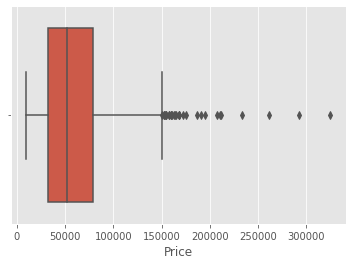

In [27]:
sns.boxplot(df.Price)

In [28]:
df[df['Price']>100000].count()[0]

177

Box Plot Shows Some Outliers In Our Data, But In Real They Are Not Outliers But Actual Values. The Reason is behind being far from the mean can be-
* Some laptops like(Gaming Laptops, Mac book, etc.) are expensive then others.
* There is a brand value associated with price of the laptop. Companies Like Apple,Razor, etc. laptops are usually expensive in compare to other company laptops.

<AxesSubplot:xlabel='Price', ylabel='Density'>

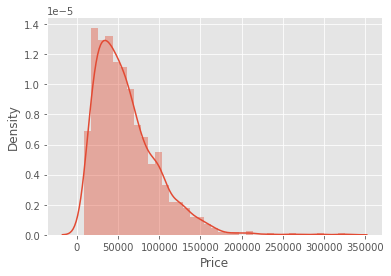

In [29]:
sns.distplot(df.Price)

The Distribution Plot Looks More Left Skewed Because Mostly Budget Friendly Laptop Ranges Are Close To Left Side of the graph.

We Can Convert this into a more likely Normal Distribution With The Help of Log Tranformation


<AxesSubplot:xlabel='Price', ylabel='Density'>

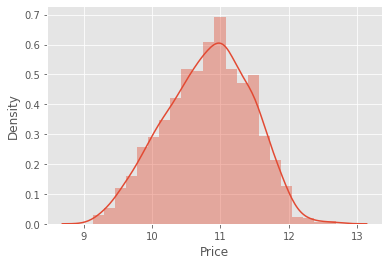

In [30]:
sns.distplot(np.log(df['Price']))

##### Company

In [31]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

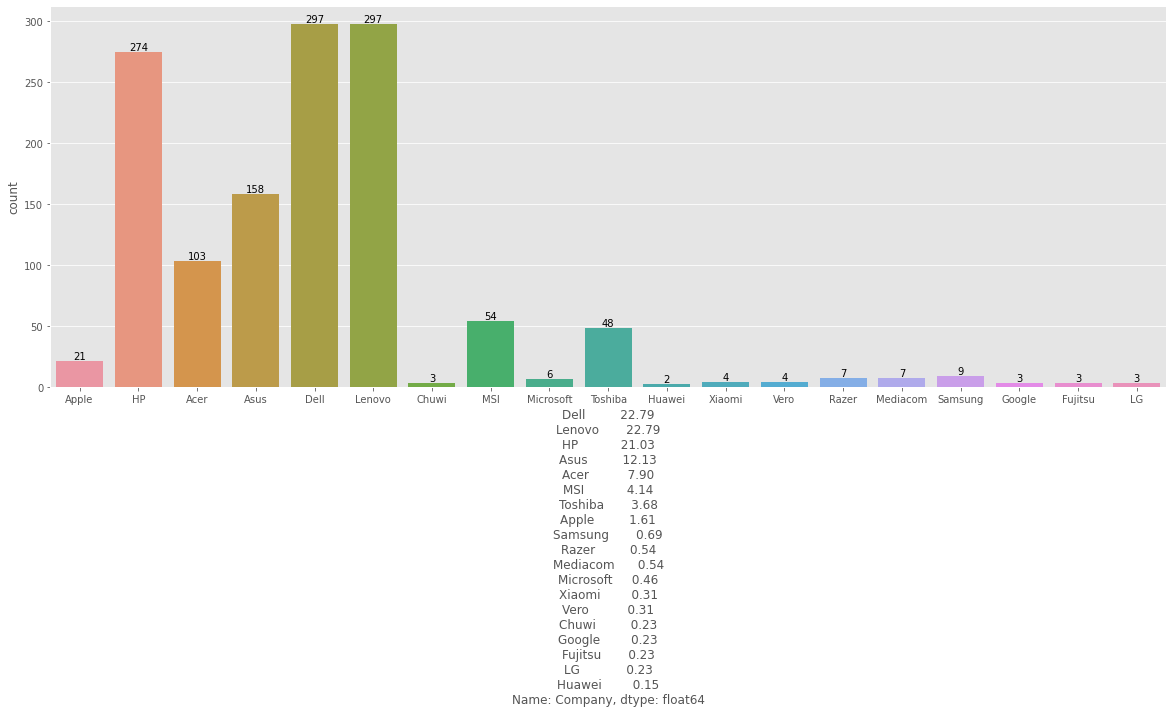

In [32]:
## Plotting 
## 1. All Unique Categories of Laptop
## 2. With Their Count 
## 3  and Percentage They Accuire In The Whole Column.

## Setting Figure Size
plt.figure(figsize=(20,7))

## Countplot for plotting distinct category of Company Column
ax = sns.countplot('Company',data=df)

## Adding A Distinct Company Occurence Count As Bar Label
ax.bar_label(ax.containers[0])

## Calculating The Percetage of All Distinct Categories
labels = ((df['Company'].value_counts() / len(df))*100).round(2)

## Adding Percentages As xlabel
plt.xlabel(f'{labels}')

## Showing The Plot
plt.show()

By Observing Above Plot We Can Conclude That In Our Dataset
1.  Dell and Lenovo Contribute Maximum In The Category.
2.  Huawei Company Laptops Has Only Two Occurrence On Our Data.
3.  `HP, Dell, Lenovo, Asus, Acer` Laptop Contribute To 80% Values of Our Data.

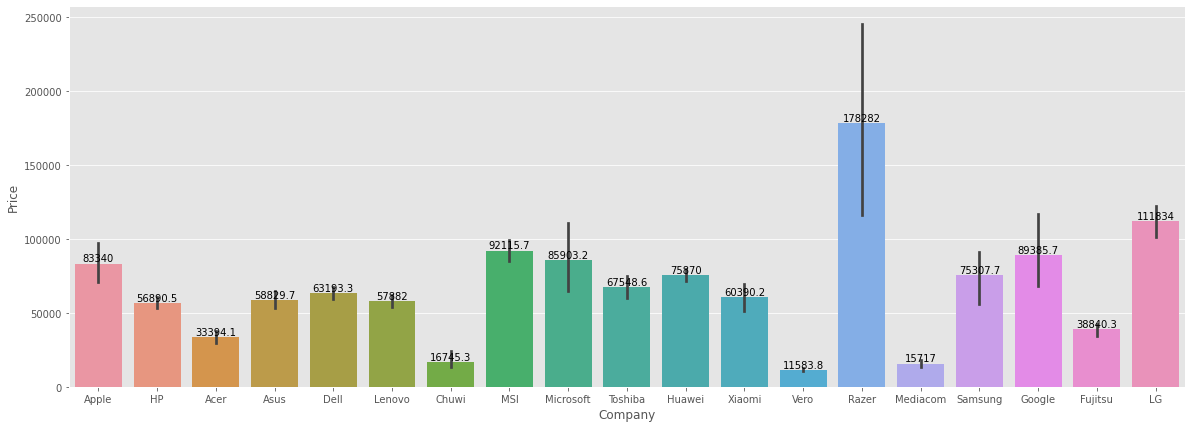

In [33]:
## Plotting 
## 1. All Unique Categories of Laptop
## 2. With Their Count 
## 3  and Percentage They Accuire In The Whole Column.

## Setting Figure Size
plt.figure(figsize=(20,7))

## Countplot for plotting distinct category of Company Column
ax = sns.barplot(x='Company',y='Price',data=df)

## Adding A Distinct Company Occurence Count As Bar Label
ax.bar_label(ax.containers[0])

## Showing The Plot
plt.show()

> Razor, LG,Google, Samsung & LG Are Most Expensive Compare To Other Laptops That Are Pocket Friendly.

##### TypeName

In [34]:
df.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

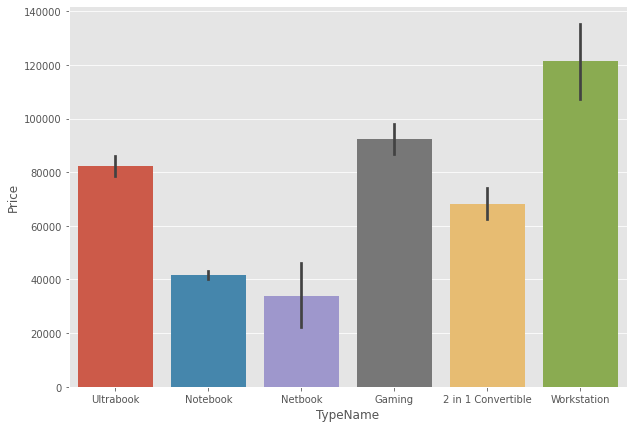

In [35]:
## Price vs Type of Laptop
plt.figure(figsize=(10,7))
ax = sns.barplot(data=df,x='TypeName',y='Price')

In [36]:
### EDA 
# Price vs Size of Screen
# How does the price vary with processors?
# How does the price vary with Ram?
# How does the price vary with SSD or HDD?
# How does the price vary with GPU?

In [37]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

# MORE EDA TO BE DONE LATER

### STEP 3: DATA CLEANING

In [38]:
nominal_categorical_columns = [feature for feature in df.columns if df[feature].dtype=='O' and df[feature].nunique()<25]
nominal_categorical_columns

['Company', 'TypeName', 'Ram', 'OpSys']

In [39]:
ordinal_categorical_columns = [feature for feature in df.columns if df[feature].dtype=='O' and df[feature].nunique()>25]
ordinal_categorical_columns

['ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'Weight']

In [40]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636


In [41]:
## Creating A List of Columns To Track All The Remaining Columns
remaining_col = list(df.columns)

##### Ram

In [42]:
df['Ram'].head(),df['Ram'].unique(),df['Ram'].nunique()

(0     8GB
 1     8GB
 2     8GB
 3    16GB
 4     8GB
 Name: Ram, dtype: object,
 array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
       dtype=object),
 9)

In [43]:
df['Ram'] = df['Ram'].str.replace('GB','').astype(int)

##### Weight

In [44]:
df['Weight'].head(),df['Weight'].unique(),df['Weight'].nunique()

(0    1.37kg
 1    1.34kg
 2    1.86kg
 3    1.83kg
 4    1.37kg
 Name: Weight, dtype: object,
 array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
        '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
        '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
        '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
        '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
        '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
        '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
        '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
        '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
        '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
        '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
        '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
        '2.69kg', '2.37kg', '4.7kg', '3.6kg'

In [45]:
df['Weight'] = df['Weight'].str.replace('kg','').astype('float')

In [46]:
df[['Ram','Weight']].sample(6),df[['Ram','Weight']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ram     1303 non-null   int32  
 1   Weight  1303 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 15.4 KB


(      Ram  Weight
 795     8    1.42
 270     8    1.37
 1033    8    1.95
 35      4    1.44
 1151    4    1.86
 1002    4    2.18,
 None)

Great!, Ram and Weight is Done

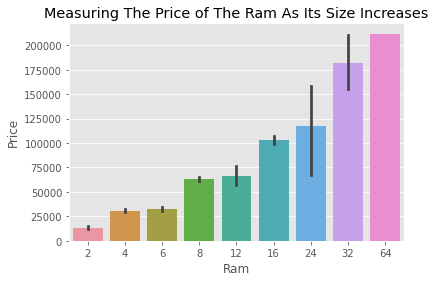

In [47]:
sns.barplot(data=df, x='Ram',y='Price')
plt.xticks()
plt.title("Measuring The Price of The Ram As Its Size Increases")
plt.show()

In [48]:
remaining_col.remove('Ram')
remaining_col.remove('Weight')

In [49]:
remaining_col

['Company',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Memory',
 'Gpu',
 'OpSys',
 'Price']

##### Inches

In [50]:
df['Inches'].dtype,df['Inches'].isna().sum()

(dtype('float64'), 0)

In [51]:
remaining_col.remove('Inches')

##### ScreenResolution

In [52]:
df['ScreenResolution'].unique(),df['ScreenResolution'].nunique()

(array(['IPS Panel Retina Display 2560x1600', '1440x900',
        'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
        '1366x768', 'IPS Panel Full HD 1920x1080',
        'IPS Panel Retina Display 2304x1440',
        'IPS Panel Full HD / Touchscreen 1920x1080',
        'Full HD / Touchscreen 1920x1080',
        'Touchscreen / Quad HD+ 3200x1800',
        'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
        'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
        'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
        'IPS Panel Full HD 2160x1440',
        '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
        '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
        '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
        'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
        'IPS Panel Full HD 2560x1440',
        'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
        '2560x1440', 'IPS Panel Quad HD+ 2560x1440',


In [53]:
## Let's Extract TouchScreen From Screen Resolution
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'touchscreen' in x.lower() else 0)

In [54]:
## Extracting IPS Panel Information
df['IPSDisplay'] = df['ScreenResolution'].apply(lambda x:1 if 'ips panel' in x.lower() else 0)

In [55]:
## Extracting Actual Screen Resolution
df['Y_res'] = df['ScreenResolution'].apply(lambda x:x.split('x')[1])

df['X_res'] = df['ScreenResolution'].apply(lambda x:x.split('x')[0]).apply(lambda x:x.split(' ')[-1])

In [56]:
df[['X_res','Y_res']].isna().sum()

X_res    0
Y_res    0
dtype: int64

In [57]:
df[['X_res','Y_res']].sample(10)

,X_res,Y_res
901,1920,1080
847,1920,1080
158,1920,1080
1268,1366,768
971,2560,1440
588,1366,768
1295,1366,768
750,1366,768
1179,1366,768
1053,1366,768


In [58]:
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
 11  TouchScreen       1303 non-null   int64  
 12  IPSDisplay        1303 non-null   int64  
 13  Y_res             1303 non-null   int32  
 14  X_res             1303 non-null   int32  
dtypes: float64(2), int32(4), int64(2), object(7)
memory usage: 132.5+ KB


In [60]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float').round(2)

In [61]:
## Dropping Screen Resolution, Inches, X_res and Y_res Columns
df.drop(['ScreenResolution','Inches','X_res','Y_res'],axis=1,inplace=True)

In [62]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSDisplay,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.98
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.68
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.21
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.53
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.98


##### CPU

In [63]:
df['Cpu'].sample(15)

1028              Intel Core i5 7200U 2.5GHz
640              Intel Core i7 7700HQ 2.8GHz
793               Intel Core i5 7200U 2.5GHz
295              Intel Core i7 7700HQ 2.8GHz
759               Intel Core i5 7200U 2.5GHz
892               Intel Core i7 7500U 2.7GHz
151              Intel Core i7 7700HQ 2.8GHz
358               Intel Core i5 7200U 2.5GHz
563              Intel Core i7 7700HQ 2.8GHz
1263    Intel Celeron Dual Core N3060 1.6GHz
987              Intel Core i7 7700HQ 2.8GHz
124                  AMD A9-Series 9420 3GHz
1029              Intel Core i5 7200U 2.5GHz
111               Intel Core i7 7560U 2.4GHz
1285              Intel Core i7 6500U 2.5GHz
Name: Cpu, dtype: object

In [64]:
## Extracting Clock Speed
df['ClockSpeed'] = df['Cpu'].apply(lambda x:x.split(' ')[-1]).str.replace("GHz","").astype(float)

In [65]:
df['ClockSpeed'].isna().sum()

0

In [66]:
df['ClockSpeed'].head()

0    2.3
1    1.8
2    2.5
3    2.7
4    3.1
Name: ClockSpeed, dtype: float64

In [67]:
## Extracting CPU Type
df['CPUType'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [68]:
df['CPUType'].isna().sum()

0

In [69]:
## Extracting Top 10 Most Frequent CPUType
df['CPUType'].value_counts().nlargest(10)

Intel Core i7           527
Intel Core i5           423
Intel Core i3           136
Intel Celeron Dual       80
Intel Pentium Quad       27
Intel Core M             19
AMD A9-Series 9420       12
Intel Celeron Quad        8
AMD A6-Series 9220        8
AMD A12-Series 9720P      7
Name: CPUType, dtype: int64

In [70]:
## Dividing The CPUTypes Into Differnt Categories Based On Their Frequency
def divide_into_category(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [71]:
df['CPUType'] = df['CPUType'].apply(divide_into_category)

In [72]:
df['CPUType'].head()

0    Intel Core i5
1    Intel Core i5
2    Intel Core i5
3    Intel Core i7
4    Intel Core i5
Name: CPUType, dtype: object

<AxesSubplot:>

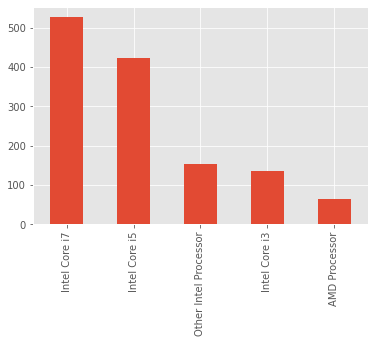

In [73]:
df['CPUType'].value_counts().plot(kind='bar')

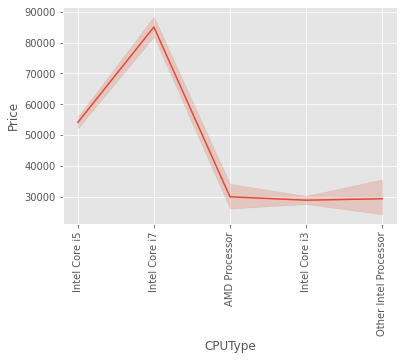

In [74]:
## Measuring The Effect of CPUType on Laptop Price
sns.lineplot(data=df,x='CPUType',y='Price')
plt.xticks(rotation='vertical')
plt.show()

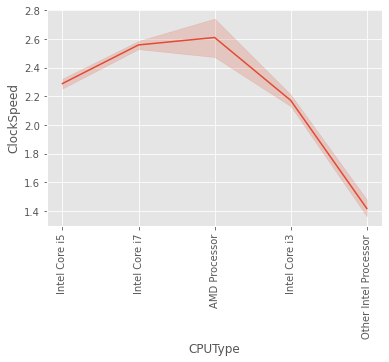

In [75]:
## Clock Speed vs CPUType
sns.lineplot(data=df,x='CPUType',y='ClockSpeed')
plt.xticks(rotation='vertical')
plt.show()

In [76]:
df.drop('Cpu',axis=1,inplace=True)

##### Memory

In [77]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [78]:
## SSD
df['SSD'] = df['Memory'].apply(lambda x:1 if 'ssd' in x.lower() else 0)
df['SSD'].head()

0    1
1    0
2    1
3    1
4    1
Name: SSD, dtype: int64

In [79]:
## Flash Storage
df['FlashStorage'] = df['Memory'].apply(lambda x:1 if 'flash' in x.lower() else 0)
df['FlashStorage'].head()

0    0
1    1
2    0
3    0
4    0
Name: FlashStorage, dtype: int64

In [80]:
## Hybrid Storage
df['HybridStorage'] = df['Memory'].apply(lambda x:1 if 'hybrid' in x.lower() else 0)
df['HybridStorage'].head()

0    0
1    0
2    0
3    0
4    0
Name: HybridStorage, dtype: int64

In [81]:
## Hard Disk
df['HDD'] = df['Memory'].apply(lambda x:1 if 'hdd' in x.lower() else 0)
df['HDD'].head()

0    0
1    0
2    0
3    0
4    0
Name: HDD, dtype: int64

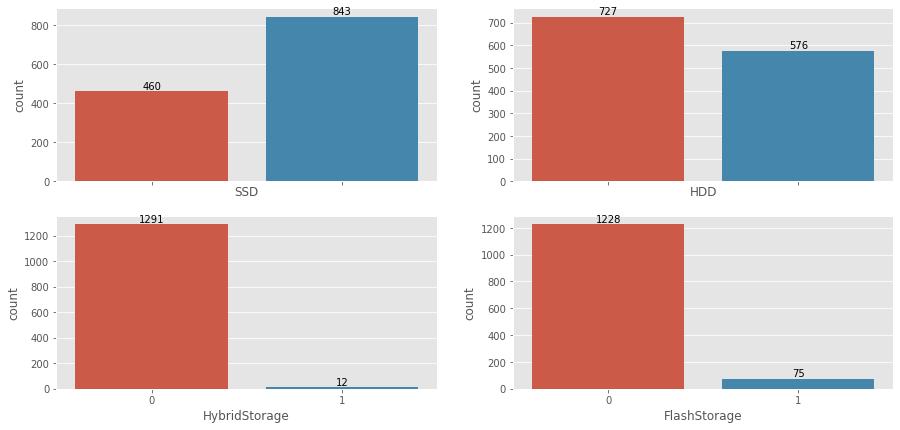

In [82]:
## Ploting All Four Memory Types (SSD, HDD, Hybrid, FlashStorage)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 7),sharex=True, sharey=False)
fig.subplots_adjust(wspace=0.2)


sns.countplot(df['SSD'],ax=ax1)
ax1.bar_label(ax1.containers[0]);

sns.countplot(df['HDD'],ax=ax2)
ax2.bar_label(ax2.containers[0]);

sns.countplot(df['HybridStorage'],ax=ax3)
ax3.bar_label(ax3.containers[0]);

sns.countplot(df['FlashStorage'],ax=ax4)
ax4.bar_label(ax4.containers[0]);

plt.show()


In [83]:
## Extracting Actual Memory Value
df['Memory'].head()

0              128GB SSD
1    128GB Flash Storage
2              256GB SSD
3              512GB SSD
4              256GB SSD
Name: Memory, dtype: object

In [84]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSDisplay,ppi,ClockSpeed,CPUType,SSD,FlashStorage,HybridStorage,HDD
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.98,2.3,Intel Core i5,1,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.68,1.8,Intel Core i5,0,1,0,0


In [85]:
df[df['Memory']=='512GB SSD +  1.0TB Hybrid']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSDisplay,ppi,ClockSpeed,CPUType,SSD,FlashStorage,HybridStorage,HDD
1081,Lenovo,Gaming,32,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.6,172627,0,1,127.34,2.7,Intel Core i7,1,0,1,0


In [86]:
## STEP 0
data = df.copy()

In [87]:
## STEP 1
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)  ## Converting Any Float Value Into Integer(like 1.0TB - 1TB)
data["Memory"] = data["Memory"].str.replace('GB', '')                       ## Replacing GB with ''
data["Memory"] = data["Memory"].str.replace('TB','000')                     ## Converting TB into GB (1TB into 1000GB For Simplicity)

In [88]:
## STEP 2
divided_data = data["Memory"].str.split("+", n = 1, expand = True)

In [89]:
### STEP 3
data["col1"]= divided_data[0]
data['col1']= data["col1"].str.strip()
data['col1']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: col1, Length: 1303, dtype: object

In [90]:
### STEP 4
data["col2"]= divided_data[1]
data['col2'].value_counts()

  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: col2, dtype: int64

In [91]:
### STEP 5
data["col1HDD"] = data["col1"].apply(lambda x: 1 if "HDD" in x else 0)
data["col1SSD"] = data["col1"].apply(lambda x: 1 if "SSD" in x else 0)
data["col1HybridStorage"] =data["col1"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["col1FlashStorage"] = data["col1"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [92]:
### STEP 6
data['col1'] = data['col1'].str.replace(r'[A-Za-z]','').str.strip().astype(int)
data['col1']

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: col1, Length: 1303, dtype: int32

In [93]:
### STEP 7
data['col2'].fillna('0',inplace=True)

In [94]:
### STEP 8
data["col2HDD"] = data["col2"].apply(lambda x: 1 if "HDD" in x else 0)
data["col2SSD"] = data["col2"].apply(lambda x: 1 if "SSD" in x else 0)
data["col2HybridStorage"] = data["col2"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["col2FlashStorage"] = data["col2"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [95]:
### STEP 9
data['col2'] = data['col2'].str.replace(r'[A-Za-z]','').str.strip().astype(int)
data['col2']

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: col2, Length: 1303, dtype: int32

In [96]:
### STEP 10 
df['HDD'] = (data["col1HDD"]*data['col1'])+(data['col2HDD']*data['col2'])
df['SSD'] = (data["col1SSD"]*data['col1'])+(data['col2SSD']*data['col2'])
df["HybridStorage"]=(data["col1HybridStorage"]*data["col1"]+data["col2HybridStorage"]*data["col2"])
df["FlashStorage"]=(data["col1FlashStorage"]*data["col1"]+data["col2FlashStorage"]*data["col2"])

In [97]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSDisplay,ppi,ClockSpeed,CPUType,SSD,FlashStorage,HybridStorage,HDD
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.98,2.3,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.68,1.8,Intel Core i5,0,128,0,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.21,2.5,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.53,2.7,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.98,3.1,Intel Core i5,256,0,0,0


In [98]:
df.drop('Memory',axis=1,inplace=True)

https://github.com/campusx-official/laptop-price-predictor-regression-project/blob/main/laptop-price-predictor.ipynb

##### GPU

In [99]:
df.Gpu.head()

0    Intel Iris Plus Graphics 640
1          Intel HD Graphics 6000
2           Intel HD Graphics 620
3              AMD Radeon Pro 455
4    Intel Iris Plus Graphics 650
Name: Gpu, dtype: object

In [100]:
## Extracting Only The GPU Name
df['Gpu'] = df['Gpu'].apply(lambda x:x.split(' ')[0])

In [101]:
df['Gpu'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [102]:
df['Gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu, dtype: int64

In [103]:
df['Gpu'].shape

(1303,)

In [104]:
## Considering Major GPUs Only
df = df[df['Gpu'] != 'ARM']

In [105]:
df['Gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu, dtype: int64

##### Os

In [106]:
df.OpSys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [107]:
df.OpSys.head()

0    macOS
1    macOS
2    No OS
3    macOS
4    macOS
Name: OpSys, dtype: object

In [108]:
df.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [109]:
def retrive_os(os):
    if 'windows' in os.lower():
        return 'Windows'
    elif 'mac' in os.lower():
        return 'Mac'
    else:
        return 'Dos/Linux/Ubuntu/Others'

In [110]:
df['OpSys'] = df['OpSys'].apply(retrive_os)

In [111]:
df['OpSys'].unique()

array(['Mac', 'Dos/Linux/Ubuntu/Others', 'Windows'], dtype=object)

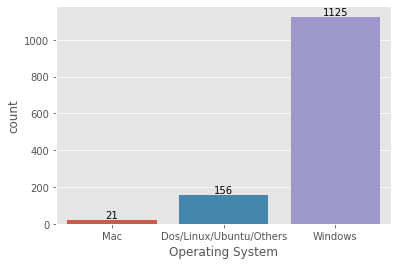

In [112]:
ax = sns.countplot(df['OpSys'])
ax.bar_label(ax.containers[0])
plt.xlabel('Operating System')
plt.show();

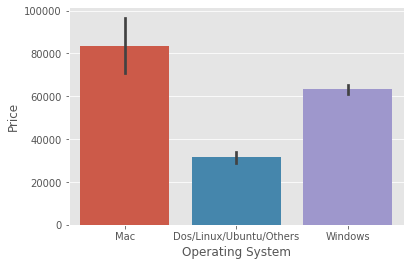

In [113]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xlabel('Operating System')
plt.show()

##### Weight

In [114]:
df.Weight.sample(10)

1226    1.29
1239    1.40
979     2.99
22      1.86
1066    3.58
947     2.20
601     2.10
912     2.20
295     3.20
1263    2.40
Name: Weight, dtype: float64

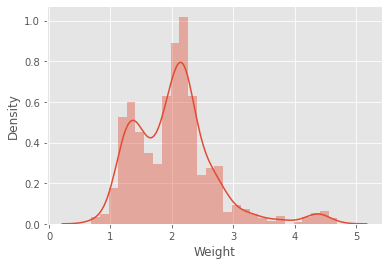

In [115]:
sns.distplot(df['Weight']);

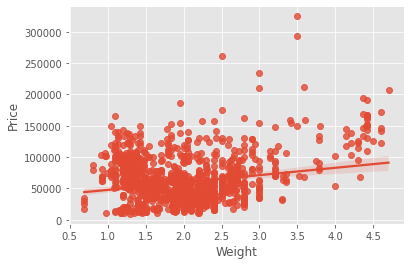

In [116]:
sns.regplot(df['Weight'],df['Price']);

Our Data is Cleaned !!

In [117]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPSDisplay,ppi,ClockSpeed,CPUType,SSD,FlashStorage,HybridStorage,HDD
0,Apple,Ultrabook,8,Intel,Mac,1.37,71378,0,1,226.98,2.3,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,Intel,Mac,1.34,47895,0,0,127.68,1.8,Intel Core i5,0,128,0,0
2,HP,Notebook,8,Intel,Dos/Linux/Ubuntu/Others,1.86,30636,0,0,141.21,2.5,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,AMD,Mac,1.83,135195,0,1,220.53,2.7,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,Intel,Mac,1.37,96095,0,1,226.98,3.1,Intel Core i5,256,0,0,0


In [118]:
df.corr()['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
TouchScreen      0.192917
IPSDisplay       0.253319
ppi              0.475387
ClockSpeed       0.430122
SSD              0.670660
FlashStorage    -0.040067
HybridStorage    0.007942
HDD             -0.096892
Name: Price, dtype: float64

## STEP 3: MODEL BUILDING

In [119]:
X = df.drop(columns=['Price'])
y = np.log(df['Price']).round(2)

In [120]:
X.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,TouchScreen,IPSDisplay,ppi,ClockSpeed,CPUType,SSD,FlashStorage,HybridStorage,HDD
0,Apple,Ultrabook,8,Intel,Mac,1.37,0,1,226.98,2.3,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,Intel,Mac,1.34,0,0,127.68,1.8,Intel Core i5,0,128,0,0
2,HP,Notebook,8,Intel,Dos/Linux/Ubuntu/Others,1.86,0,0,141.21,2.5,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,AMD,Mac,1.83,0,1,220.53,2.7,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,Intel,Mac,1.37,0,1,226.98,3.1,Intel Core i5,256,0,0,0


In [121]:
y.head()

0    11.18
1    10.78
2    10.33
3    11.81
4    11.47
Name: Price, dtype: float64

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [123]:
## METRICS
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [124]:
## MODELS
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor

### Decision Tree Regressor

In [125]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=7)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8212784008232161
MAE 0.1994782888452448


### Random Forest Regressor

In [126]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8987600296875029
MAE 0.15315014203035215


### Extra Trees Regressor

In [127]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8911027019427444
MAE 0.1532309073968305


### Gradient Boost Regressor

In [128]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8960486186949553
MAE 0.14951877748445394


### XGB Regressor

In [129]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9096706422916153
MAE 0.14298599963285477


In [131]:
from sklearn.ensemble import StackingRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=42,max_depth=7)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_depth=9)),
    ('etr',ExtraTreesRegressor(n_estimators=200,max_depth=9,random_state=42))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8797164332716638
MAE 0.1622865242860754


In [143]:
from sklearn.ensemble import VotingRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,10])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)
xgb = XGBRegressor(n_estimators=45,learning_rate=0.5,max_depth=5)


step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9045119767491963
MAE 0.14958591342006392


In [ ]:
## Saving The DF
df.to_csv('Cleaned_Laptop_data_2.csv')

In [ ]:
for :

In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open("pipe.pkl", "rb"))
pred = loaded_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,pred))